In [0]:
! pip install chord

     |████████████████████████████████| 81kB 2.2MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6502 sha256=313b873c897c0bde12a8adeda7d4cc629c587479ba3c42f710ed0b4b43068b2f
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## **Movie Recommender**

---



---



EXPLANATION OF WHATS THE PROJECT ABOUT 

In [0]:
import re
import random

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Convert our csv into dataframes

In [0]:
import pandas as pd 
import numpy as np 
import os

path_to_credits = os.path.join(os.path.sep,'content','drive','My Drive','LSMA-Final_project','tmdb-movie-metadata', 'tmdb_5000_credits.csv')
path_to_movies = os.path.join(os.path.sep,'content','drive','My Drive','LSMA-Final_project','tmdb-movie-metadata', 'tmdb_5000_movies.csv')

path_movies = '/content/gdrive/My Drive/LSMA-Final_project/tmdb-movie-metadata/tmdb_5000_movies.csv'
path_credits = '/content/gdrive/My Drive/LSMA-Final_project/tmdb-movie-metadata/tmdb_5000_credits.csv'

df_credits=pd.read_csv('/content/gdrive/My Drive/LSMA-Final_project/tmdb-movie-metadata/tmdb_5000_credits.csv')
df_movies=pd.read_csv('/content/gdrive/My Drive/LSMA-Final_project/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [0]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The first dataset contains the following features:-


cast - The name of lead and supporting actors.
crew - The name of Director, Editor, Composer, Writer etc.

*   movie_id - A unique identifier for each movie.


*   title of the movie


*   cast - The name of lead and supporting actors.


*   crew - The name of Director, Editor, Composer, Writer etc








In [0]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


WRITE WHAT IT CONTAINS

They have the same id and title, so we can add cast and crew to the dataframe, and only work with one

In [0]:
df_credits.columns = ['id','tittle','cast','crew']
df_final= df_movies.merge(df_credits,on='id')

In [0]:
df_final.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [0]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

The column crew, cast and genre is a string, so we convert it to a list to be able to acces to keys and values.

In [0]:
from ast import literal_eval

df_final['crew'] = df_final['crew'].apply(literal_eval)
df_final['genres'] = df_final['genres'].apply(literal_eval)
df_final['cast'] = df_final['cast'].apply(literal_eval)
df_final['keywords'] = df_final['keywords'].apply(literal_eval)

In [0]:
df_final['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

#EDA#

---


Explore the data to find if there are some relationships between the features.

In [0]:
import matplotlib.pyplot as plt
import itertools
from chord import Chord
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


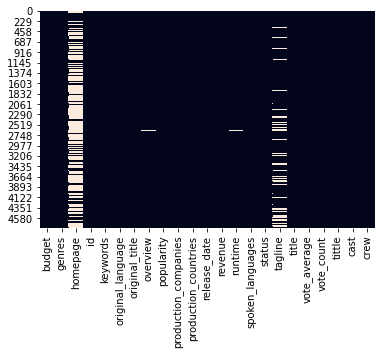

In [0]:
sns.heatmap(df_final.isnull(), cbar=False)

There are some features that are useless for our study, and also have a lot of Nan, like homepage and tagline, so we will be removing those two. 

In [0]:
df_final = df_final.drop([ 'homepage','tagline','tittle'], axis=1)

In [0]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  title                

From info and the previous graph, we can see that some features some have missing values, so we will delete those register that have no value, so that we have a clean data. 

In [0]:
df_final = df_final.dropna()

Plots of the scatter plot between the features and the histogram in the diagonal and the correlation matrix. Here we can see the degree of lineal relationship between the features, we can see some of them that clearly correlated.


*   Vote_count and revenue. Seems logical as the more people rates a movie it means that has saw the movie and has paid for it.
*   Budget and revenue.
* Popularity and vote_count. Popularity is a varying metric, it depends on vote_count but also on daily metrics, as it is indicated [here](https://developers.themoviedb.org/3/getting-started/popularity)

There more correlations such as:
* Popularity with revenue and budget.
* Vote_count and budget. 

There are others correlations that have a weaker linear correlation, but we can see some trend that is non-linear and it is interesting for our study.We see that the vote_average has no strong correlation with the features.
* We can detect some outliers, because we see that the movies best voted have a very low number of votes, we should take this into account if we want to list the best voted movies.
* There is a trend number of votes and revenue, usually as it grows the average vote increments. It is similar for the budget but the relation is weaker.


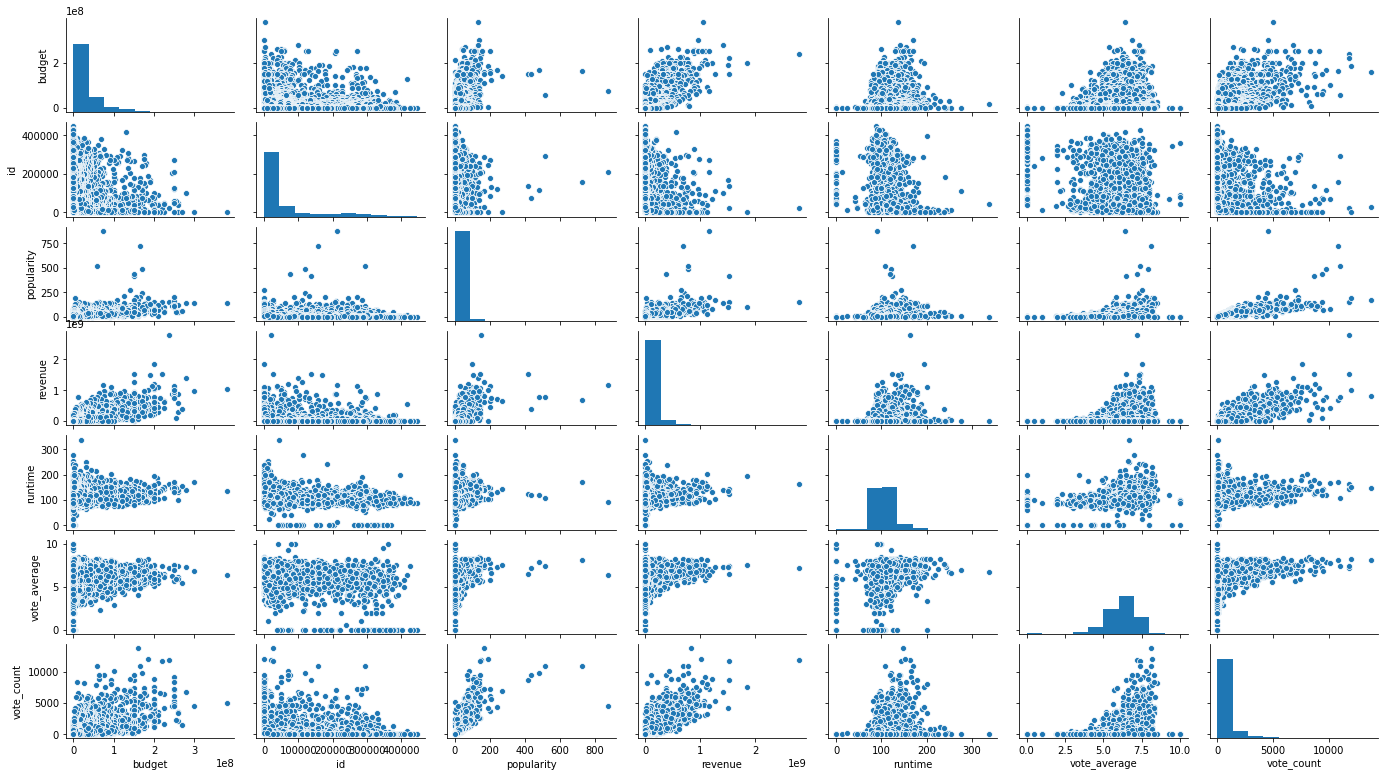

In [0]:
sns.pairplot(df_final, height = 1.5, diag_kind = 'hist', aspect=1.8)

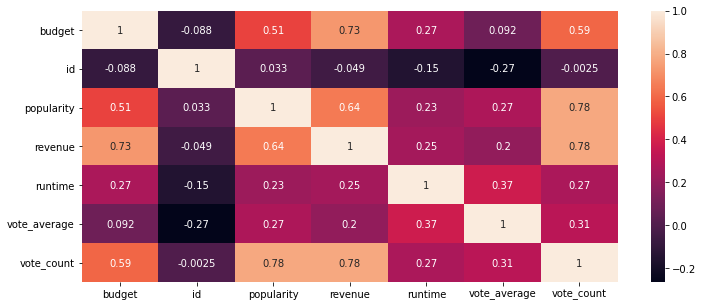

In [0]:
plt.figure(figsize = (12,5))
sns.heatmap(df_final.corr(), annot=True)

Lets see what is the top 10 movies according to number of votes.

In [0]:
df_top10 = df_final.sort_values(by='vote_count', ascending=False)[:10]

df_top10.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
96,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",27205,"[{'id': 1014, 'name': 'loss of lover'}, {'id':...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Inception,8.1,13752,"[{'cast_id': 1, 'character': 'Dom Cobb', 'cred...","[{'credit_id': '56e8462cc3a368408400354c', 'de..."
65,185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",155,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Dark Knight,8.2,12002,"[{'cast_id': 35, 'character': 'Bruce Wayne', '...","[{'credit_id': '55a0eb4a925141296b0010f8', 'de..."
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
16,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Avengers,7.4,11776,"[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de..."
788,58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",293660,"[{'id': 2095, 'name': 'anti hero'}, {'id': 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Deadpool,7.4,10995,"[{'cast_id': 99, 'character': 'Wade Wilson / D...","[{'credit_id': '56c986b2925141172f0068b6', 'de..."


In [0]:
test=df_final['keywords'][0]

In [0]:
type(test)

list

In [0]:
test1=df_final['genres'][0]

In [0]:
type(test1)

list

Text(0.5, 1.0, 'The top 10 popular movies')

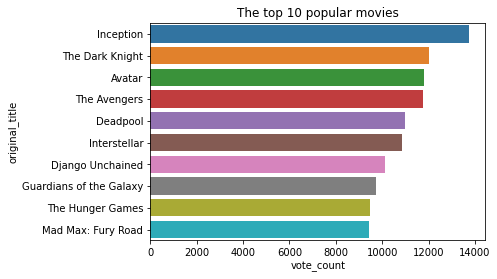

In [0]:
sns.barplot(x=df_top10['vote_count'], y=df_top10['original_title'])
plt.title('The top 10 popular movies')

Text(0.5, 1.0, 'The top 10 movies based on vote')

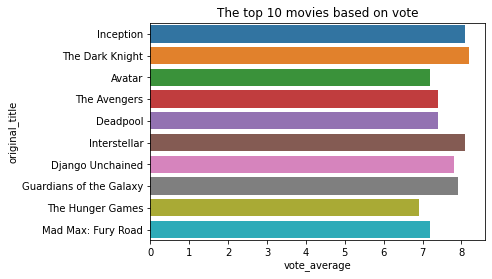

In [0]:
sns.barplot(x=df_top10['vote_average'], y=df_top10['original_title'])
plt.title('The top 10 movies based on vote')

Text(0.5, 1.0, 'The 10 highest grossing movies')

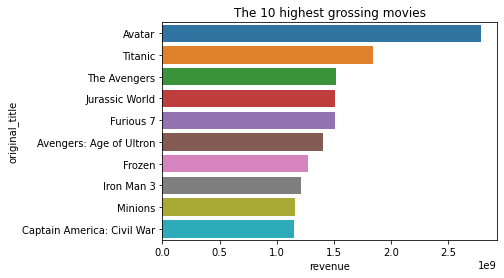

In [0]:
grossing_movies = df_final.sort_values(by='revenue', ascending=False)[:10]
sns.barplot(x=grossing_movies['revenue'] , y=grossing_movies['original_title'])
plt.title('The 10 highest grossing movies')

The top10 most occuring movies

Text(0.5, 1.0, '10 most Occurring movies')

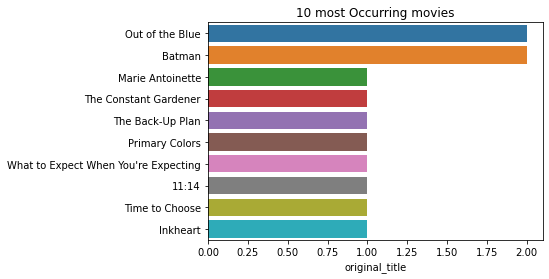

In [0]:
titles = df_final['original_title'].value_counts()[:10]
sns.barplot(x = titles, y = titles.index)
plt.title("10 most Occurring movies")

Text(0.5, 1.0, '10 most movies by language')

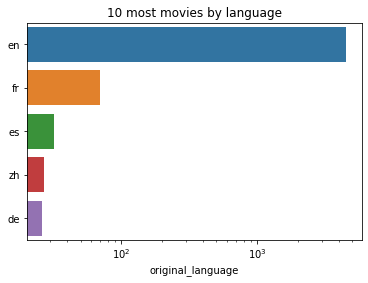

In [0]:
lang_df = df_final['original_language'].value_counts()[:5]
sns.barplot(x = lang_df, y = lang_df.index, log = 'True')
plt.title("10 most movies by language")

In [0]:

df_final.loc[df_final['original_title'] == 'Batman']

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
1359,35000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",268,"[{'id': 848, 'name': 'double life'}, {'id': 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Batman,7.0,2096,"[{'cast_id': 5, 'character': 'Jack Napier/The ...","[{'credit_id': '52fe422fc3a36847f800aa4b', 'de..."
4267,1377800,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",2661,"[{'id': 339, 'name': 'submarine'}, {'id': 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman,6.1,203,"[{'cast_id': 17, 'character': 'Batman / Bruce ...","[{'credit_id': '52fe4363c3a36847f80509a7', 'de..."


#Let´s design a graphic with the co-ocurrence of the genres.

The genres are now in lists of dictionaries. Let's convert them to lists of strings.

In [0]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return sorted(names)
    return

In [0]:
genres = df_final['genres'].apply(get_list)
pd.DataFrame(genres)

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Action, Adventure, Fantasy]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"
...,...
4798,"[Action, Crime, Thriller]"
4799,"[Comedy, Romance]"
4800,"[Comedy, Drama, Romance, TV Movie]"
4801,[]


Remove all samples which contain an empty list

In [0]:
genres = genres[genres.str.len() > 0]
pd.DataFrame(genres)

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Action, Adventure, Fantasy]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"
...,...
4797,"[Foreign, Thriller]"
4798,"[Action, Crime, Thriller]"
4799,"[Comedy, Romance]"
4800,"[Comedy, Drama, Romance, TV Movie]"


Generate the co-ocurrence matrix, this is getting the combinations within each list.

In [0]:
genres = [list(itertools.combinations(i,2)) for i in genres]
pd.DataFrame(genres)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,"(Action, Adventure)","(Action, Fantasy)","(Action, Science Fiction)","(Adventure, Fantasy)","(Adventure, Science Fiction)","(Fantasy, Science Fiction)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"(Action, Adventure)","(Action, Fantasy)","(Adventure, Fantasy)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"(Action, Adventure)","(Action, Crime)","(Adventure, Crime)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"(Action, Crime)","(Action, Drama)","(Action, Thriller)","(Crime, Drama)","(Crime, Thriller)","(Drama, Thriller)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"(Action, Adventure)","(Action, Science Fiction)","(Adventure, Science Fiction)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,"(Foreign, Thriller)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4768,"(Action, Crime)","(Action, Thriller)","(Crime, Thriller)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4769,"(Comedy, Romance)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4770,"(Comedy, Drama)","(Comedy, Romance)","(Comedy, TV Movie)","(Drama, Romance)","(Drama, TV Movie)","(Romance, TV Movie)",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Flatten the nested lists, this will give us all the genre pairings in original and reversed order.

In [0]:
genres = list(itertools.chain.from_iterable((i, i[::-1]) for c_ in genres for i in c_))
pd.DataFrame(genres)

,0,1
0,Action,Adventure
1,Adventure,Action
2,Action,Fantasy
3,Fantasy,Action
4,Action,Science Fiction
...,...,...
24655,Romance,Drama
24656,Drama,TV Movie
24657,TV Movie,Drama
24658,Romance,TV Movie


And create the matrix with the count of each ocurrence

In [0]:
matrix = pd.pivot_table(pd.DataFrame(genres), index=0, columns=1, aggfunc="size", fill_value=0).values.tolist()
pd.DataFrame(matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,465,26,258,276,3,339,62,144,5,58,76,9,57,63,277,1,547,55,35
1,465,0,114,223,56,2,183,211,190,2,27,20,7,37,66,205,0,203,30,22
2,26,114,0,125,0,0,19,195,61,1,0,0,14,1,8,30,1,3,1,2
3,258,223,125,0,180,11,576,299,166,9,11,78,84,27,484,109,4,113,8,17
4,276,56,0,180,0,1,381,8,10,4,13,36,11,105,47,18,1,414,4,9
5,3,2,0,11,1,0,7,5,0,2,6,1,15,1,0,0,0,1,0,0
6,339,183,19,576,381,7,0,121,99,27,175,84,106,175,603,102,5,554,118,34
7,62,211,195,299,8,5,121,0,149,3,1,1,32,6,52,58,3,7,0,3
8,144,190,61,166,10,0,99,149,0,0,0,53,11,19,64,85,0,63,3,2
9,5,2,1,9,4,2,27,3,0,0,3,0,0,0,9,0,0,3,1,0


Now for the names of our genres.

In [0]:
names = np.unique(genres).tolist()
pd.DataFrame(names)

,0
0,Action
1,Adventure
2,Animation
3,Comedy
4,Crime
5,Documentary
6,Drama
7,Family
8,Fantasy
9,Foreign


In [0]:


Chord(matrix, names, wrap_labels=False, margin=50).show()

The information from this graph is going to be later use when we design the content-based, based on genre and plot. As we can verify if the recommender is recommending good film, taking a look at the relation between genre that the graph shows. 

# Word visualization 

Using the method we defined before, we are going to extract the most used keywords. 

In [0]:
keywords = df_final['keywords'].apply(get_list)
test=pd.DataFrame(keywords)

In [0]:
df_final['keywords']=test

In [0]:
df_final.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[3d, alien, alien planet, anti war, battle, cg...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[aftercreditsstinger, afterlife, alliance, cal...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[based on novel, british secret service, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[batman, burglar, cat burglar, catwoman, cover...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[19th century, 3d, alien, alien race, based on...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [0]:
test.head()

,keywords
0,"[3d, alien, alien planet, anti war, battle, cg..."
1,"[aftercreditsstinger, afterlife, alliance, cal..."
2,"[based on novel, british secret service, mi6, ..."
3,"[batman, burglar, cat burglar, catwoman, cover..."
4,"[19th century, 3d, alien, alien race, based on..."


We use the library word cloud to help visualize the most common keywords.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [0]:
str1_new = ''

for index, row in test.iterrows():
  #print(index)
  #print(row['keywords'])
  str1 = ' '.join(row['keywords'])
  #print(str1)
  str1_new = str1_new + str1 




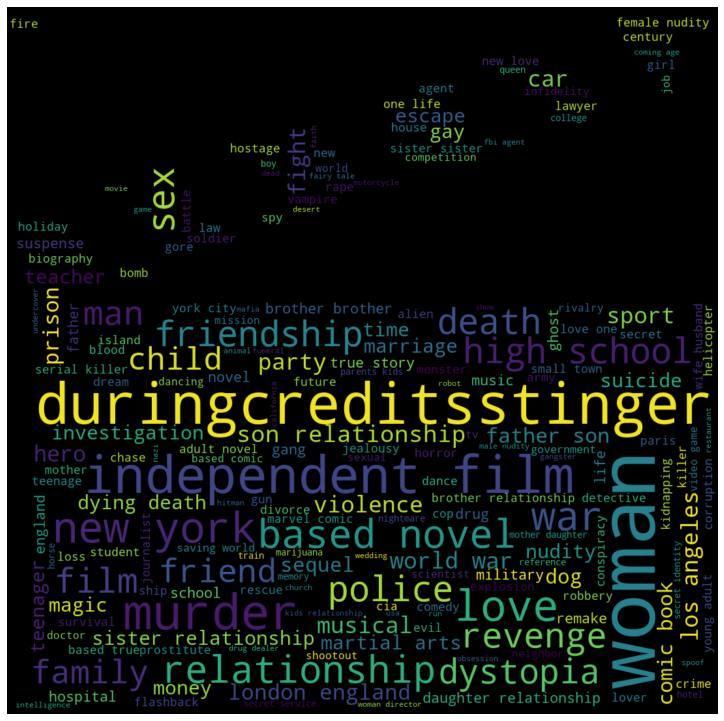

In [0]:
wave_mask = np.array(Image.open( '/content/gdrive/My Drive/LSMA-Final_project/tmdb-movie-metadata/test2.png'))

wordcloud = WordCloud(mask=wave_mask).generate(str1_new)
plt.figure(figsize=(15,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


The following image, shows the most common keywords for every movie in the dataset. We can highlight some of them like woman, new york, independent, duringcreditstinger (which might be a typo error),relationship, etc.... 

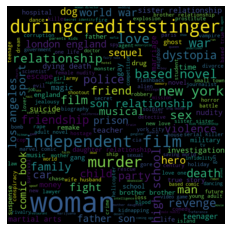

In [0]:
# Create the wordcloud object
wordcloud = WordCloud(width=640, height=640, margin=0).generate(str1_new)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


# **Recommender Systems**

---



## **Simple recommender**




The simple recommender will recommend the best movies according to its score. But if we show which have the best score we can see that is not correct, some movies have a really high score because ony a few people have voted it.

In [0]:
df_final.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[3d, alien, alien planet, anti war, battle, cg...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[aftercreditsstinger, afterlife, alliance, cal...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[based on novel, british secret service, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[batman, burglar, cat burglar, catwoman, cover...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[19th century, 3d, alien, alien race, based on...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [0]:
df_topVoted = df_final.sort_values(by='vote_average', ascending=False)[:10]
df_topVoted[['original_title', 'title', 'vote_average', 'vote_count']]

,original_title,title,vote_average,vote_count
4247,Me You and Five Bucks,Me You and Five Bucks,10.0,2
4662,Little Big Top,Little Big Top,10.0,1
4045,"Dancer, Texas Pop. 81","Dancer, Texas Pop. 81",10.0,1
3519,Stiff Upper Lips,Stiff Upper Lips,10.0,1
3992,Sardaarji,Sardaarji,9.5,2
2386,One Man's Hero,One Man's Hero,9.3,2
1881,The Shawshank Redemption,The Shawshank Redemption,8.5,8205
2970,There Goes My Baby,There Goes My Baby,8.5,2
2796,The Prisoner of Zenda,The Prisoner of Zenda,8.4,11
3337,The Godfather,The Godfather,8.4,5893



We calculate a weighted rating to take into account the number of votes.
Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,

- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie;
- C is the mean vote across the whole report

In [0]:
# Mean vote for all the movies
C = df_final['vote_average'].mean()
print(C)

# Minimum number of votes required to be in the chart, m. We consider the 90% of all the movies
m = df_final['vote_count'].quantile(0.10)
print(m)

6.094186288810164
12.0


In [0]:
df_final.shape

(4799, 20)

In [0]:
# Filter out all qualified movies into a new DataFrame
df_topvoted = df_final.copy().loc[df_final['vote_count'] >= m]
df_topvoted.shape

(4325, 20)

In [0]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the tmdb formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [0]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
df_topvoted['score'] = df_topvoted.apply(weighted_rating, axis=1)

In [0]:
#Sort movies based on score calculated above
df_topvoted = df_topvoted.sort_values('score', ascending=False)

#Print the top 15 movies
df_topvoted[['title', 'vote_count', 'vote_average', 'score']].head(25)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.496487
3337,The Godfather,5893,8.4,8.395314
662,Fight Club,9413,8.3,8.297192
3232,Pulp Fiction,8428,8.3,8.296864
1818,Schindler's List,4329,8.3,8.293902
3865,Whiplash,4254,8.3,8.293795
2294,Spirited Away,3840,8.3,8.293128
2731,The Godfather: Part II,3338,8.3,8.292099
65,The Dark Knight,12002,8.2,8.197897
809,Forrest Gump,7927,8.2,8.196817


From the graph in the EDA section we showed the top 10 most popular movies, based on vote count. 
The top 5 were: 
- inception 
- the dark night 
- avatar
- the avengers 
- deadpool 

As we can see, we have sorted the movies based on the score calculate, and we do not have the same movies, as we have seen that some best votes, were only voted by 1 person. 

## **Content-based Recommender**





We will be analyizing 2 types of content-based recommender:
- Plot and genre 
- Director and cast 

But since the plot is quite big, and therefore concatenating many text as one string is going to be huge, we are first going to it with the keywords, as its one word that represent a film and not a big text. 


# Content-based recommender: keywords and genre

We will start doing it only for keywords and then only for genre, and then combine both of them.


**Keyword-based recommender**

First we need to do some cleaning with the keywords.

In [0]:
type(test)

pandas.core.frame.DataFrame

In [0]:
keywords = test['keywords']

In [0]:
type(keywords)

pandas.core.series.Series

In [0]:
print(type(keywords[0]))

<class 'list'>


In [0]:
final_cleaned_words_list = []
for words_list in keywords:
  str1 =' '.join(words_list)
  #print(type(str1))
  #print(str1)
  final_cleaned_words_list.append(str1)

In [0]:
print (final_cleaned_words_list)

In [0]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import re

final_cleaned_words = []

for keyword in final_cleaned_words_list:
  #string = ' '.join(keywodf)
  #print(keyword)
  #print(words)
  words_in_keyword = word_tokenize(keyword)
  # convert to lower case
  lowercase_words_in_keyword = [word.lower() for word in words_in_keyword]
  #print(tokens)
  punct_table = str.maketrans('', '', string.punctuation)
  word_no_punctuation = [word.translate(punct_table) for word in lowercase_words_in_keyword]
  #print(stripped)
  # remove remaining tokens that are not alphabetic
  alpha_words = [word for word in word_no_punctuation if word.isalpha()]
  #print(words)
  stop_words = set(stopwords.words('english'))
  cleaned_words = [word for word in alpha_words if not word in stop_words]
  #print(cleaned_words)
  final_cleaned_words.append(' '.join(cleaned_words))

In [0]:
final_cleaned_words[0]

'alien alien planet anti war battle cgi culture clash future futuristic love affair marine mind soul power relations romance society soldier space space colony space travel space war tribe'

In [0]:
df_final['keywords'] = final_cleaned_words 

In [0]:
type(final_cleaned_words[0])

str

In [0]:
type(df_final['keywords'][0])

str

In order to pass it to the tf-id, it has to a be list of strings.

In [0]:
tf_keywords = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_keywords = tf_keywords.fit_transform(final_cleaned_words)
cosine_sim_keywords = linear_kernel(tfidf_matrix_keywords, tfidf_matrix_keywords)

In [0]:
df_final.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,alien alien planet anti war battle cgi culture...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,aftercreditsstinger afterlife alliance calypso...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,based novel british secret service secret agen...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,batman burglar cat burglar catwoman coverup cr...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,century alien alien race based novel edgar ric...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [0]:
#an array with all the titles
titles1 = df_final['title']
indices1 = pd.Series(df_final.index, index=df_final['title'])


def keywords_recommendations(title):
    idx = indices1[title]
    sim_scores = list(enumerate(cosine_sim_keywords[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles1.iloc[book_indices]

In [0]:
keywords_recommendations('Toy Story').head(20)

1191                Small Soldiers
42                     Toy Story 3
3167                  Child's Play
2749                Child's Play 2
1074    The Indian in the Cupboard
903                            Ted
616                          Ted 2
1876               Bride of Chucky
1693                Seed of Chucky
1108                     Pinocchio
3418                     Annabelle
343                    Toy Story 2
2314                           Big
533                  Monster House
69                            Hugo
111                   Transformers
1264     The Deep End of the Ocean
1040               The Flintstones
727             Jingle All the Way
2885                  Married Life
Name: title, dtype: object

Lets try and do it only based in genre. 

In [0]:
genres_list = df_final['genres'].apply(get_list)
df_genres=pd.DataFrame(genres_list)

In [0]:
df_genres.head()

,genres
0,None
1,None
2,None
3,None
4,None


In [0]:
genres_series = df_genres['genres']

In [0]:
print(genres_series)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Action, Adventure, Fantasy]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4799, dtype: object


In [0]:
final_cleaned_genres_string = []
for words_list in genres_series:
  #print(words_list)
  str1 =' '.join(words_list)
  #print(type(str1))
  #print(str1)
  final_cleaned_genres_string.append(str1)

In [0]:
final_cleaned_genres_string[0]

'Action Adventure Fantasy Science Fiction'

In [0]:
 df_final['genres']= final_cleaned_genres_string

In [0]:
df_final['genres'][0]

'Action Adventure Fantasy Science Fiction'

In [0]:
tf_genre = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_genre = tf_genre.fit_transform(df_final['genres'])
cosine_sim_genre = linear_kernel(tfidf_matrix_genre, tfidf_matrix_genre)

In [0]:
#an array with all the titles
titles = df_final['title']
indices1 = pd.Series(df_final.index, index=df_final['title'])


def genre_recommendations(title):
    idx = indices1[title]
    sim_scores = list(enumerate(cosine_sim_genre[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [0]:
genre_recommendations('Toy Story').head(20)

173                          Happy Feet Two
231                          Monsters, Inc.
318                               Surf's Up
343                             Toy Story 2
347       Cloudy with a Chance of Meatballs
429                          Over the Hedge
464                    Hotel Transylvania 2
481            Looney Tunes: Back in Action
496     Cloudy with a Chance of Meatballs 2
506                         Despicable Me 2
558                      The Simpsons Movie
686                                     Hop
692                          Chicken Little
766         Garfield: A Tail of Two Kitties
837                              Free Birds
896                                Barnyard
926                                Garfield
1121                            Chicken Run
1293                          Frankenweenie
1541                              Toy Story
Name: title, dtype: object

For future conclusions, we should see what genre has The avengers, and see how it relates to other genres according to our graph in the EDA, and see if the results make sense with the graph. 

# Genre and keywords -based Recommender

In [0]:
df_final.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,Action Adventure Fantasy Science Fiction,19995,alien alien planet anti war battle cgi culture...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,Action Adventure Fantasy,285,aftercreditsstinger afterlife alliance calypso...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,Action Adventure Crime,206647,based novel british secret service secret agen...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,Action Crime Drama Thriller,49026,batman burglar cat burglar catwoman coverup cr...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,Action Adventure Science Fiction,49529,century alien alien race based novel edgar ric...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [0]:
df_final['combo'] = (pd.Series(df_final[['genres', 'keywords']].fillna('').values.tolist()).str.join(' '))

In [0]:
df_final.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,combo
0,237000000,Action Adventure Fantasy Science Fiction,19995,alien alien planet anti war battle cgi culture...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Action Adventure Fantasy Science Fiction alien...
1,300000000,Action Adventure Fantasy,285,aftercreditsstinger afterlife alliance calypso...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Action Adventure Fantasy aftercreditsstinger a...
2,245000000,Action Adventure Crime,206647,based novel british secret service secret agen...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Action Adventure Crime based novel british sec...
3,250000000,Action Crime Drama Thriller,49026,batman burglar cat burglar catwoman coverup cr...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Action Crime Drama Thriller batman burglar cat...
4,260000000,Action Adventure Science Fiction,49529,century alien alien race based novel edgar ric...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Action Adventure Science Fiction century alien...
5,258000000,Action Adventure Fantasy,559,amnesia death friend dual identity egomania fo...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",Action Adventure Fantasy amnesia death friend ...
6,260000000,Animation Family,38757,animal sidekick animation based fairy tale blo...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.

In [0]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                

In [0]:
df_final = df_final.dropna()

In [0]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4798
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4795 non-null   int64  
 1   genres                4795 non-null   object 
 2   id                    4795 non-null   int64  
 3   keywords              4795 non-null   object 
 4   original_language     4795 non-null   object 
 5   original_title        4795 non-null   object 
 6   overview              4795 non-null   object 
 7   popularity            4795 non-null   float64
 8   production_companies  4795 non-null   object 
 9   production_countries  4795 non-null   object 
 10  release_date          4795 non-null   object 
 11  revenue               4795 non-null   int64  
 12  runtime               4795 non-null   float64
 13  spoken_languages      4795 non-null   object 
 14  status                4795 non-null   object 
 15  title                

In [0]:
tf_combo = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_combo = tf_combo.fit_transform(df_final['combo'])
cosine_sim_combo = linear_kernel(tfidf_matrix_combo, tfidf_matrix_combo)

In [0]:
titles = df_final['title']
indices = pd.Series(df_final.index, index=df_final['title'])


def combo_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_combo[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [0]:
combo_recommendations('Toy Story').head(20)

1191                Small Soldiers
42                     Toy Story 3
3166                  The Best Man
2748               Harriet the Spy
1074    The Indian in the Cupboard
903                            Ted
1983              Meet the Deedles
616                          Ted 2
1108                     Pinocchio
343                    Toy Story 2
1876               Bride of Chucky
1693                Seed of Chucky
3402                The Snow Queen
492                 Top Cat Begins
533                  Monster House
3417                   Elite Squad
2898        City of Life and Death
4637                 American Desi
1336                  Dolphin Tale
2314                           Big
Name: title, dtype: object

Now lets see what we obtain taking into account the overview and not only the keywords. 

**Overview-based recommender**

Fist we need to do some text cleaning, we need to eliminate the stop words that do not provide any meaning. 

In [0]:
type(df_final['overview'])

pandas.core.series.Series

In [0]:
plot = df_final['overview']

In [0]:

final_cleaned_text = []

for text in plot:
  #print(index)  
  words_in_text = word_tokenize(text)
  # convert to lower case
  lowercase_words_in_text = [word.lower() for word in words_in_text]
  #print(tokens)
  punct_table = str.maketrans('', '', string.punctuation)
  word_no_punctuation = [word.translate(punct_table) for word in lowercase_words_in_text]
  #print(stripped)
  # remove remaining tokens that are not alphabetic
  alpha_words = [word for word in word_no_punctuation if word.isalpha()]
  #print(words)
  stop_words = set(stopwords.words('english'))
  cleaned_words = [word for word in alpha_words if not word in stop_words]
  #print(cleaned_words)
  final_cleaned_text.append(' '.join(cleaned_words))
  

In [0]:
print(final_cleaned_text[0])

century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilization


In [0]:
df_final['overview']=final_cleaned_text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
tf_text = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_text = tf_text.fit_transform(final_cleaned_text)
cosine_sim_text = linear_kernel(tfidf_matrix_text, tfidf_matrix_text)

In [0]:
titles = df_final['title']
indices = pd.Series(df_final.index, index=df_final['title'])


def overview_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_text[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [0]:
overview_recommendations('Toy Story')

42                                            Toy Story 3
343                                           Toy Story 2
1779                               The 40 Year Old Virgin
891                                       Man on the Moon
3379                                         Factory Girl
2869                               For Your Consideration
3873                                        Class of 1984
3065                                           Heartbeeps
3383                                            Losin' It
2569                                          Match Point
2221                                              The Man
822                                     Maid in Manhattan
837                                            Free Birds
4108                            In the Shadow of the Moon
2479                                           Radio Days
915                                               Stepmom
4195                                 I Spit on Your Grave
4279    The 41

We obtain different results for the same movie, even though the keywords represent the overview briefly.Now lets try to combine the overview with genre and we can compare it to the previous keyword-genre-based recommender. 

# Overview-genre - based Recommender

In [0]:
df_final.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,combo
0,237000000,Action Adventure Fantasy Science Fiction,19995,alien alien planet anti war battle cgi culture...,en,Avatar,century paraplegic marine dispatched moon pand...,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Action Adventure Fantasy Science Fiction alien...
1,300000000,Action Adventure Fantasy,285,aftercreditsstinger afterlife alliance calypso...,en,Pirates of the Caribbean: At World's End,captain barbossa long believed dead come back ...,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Action Adventure Fantasy aftercreditsstinger a...
2,245000000,Action Adventure Crime,206647,based novel british secret service secret agen...,en,Spectre,cryptic message bond past sends trail uncover ...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Action Adventure Crime based novel british sec...
3,250000000,Action Crime Drama Thriller,49026,batman burglar cat burglar catwoman coverup cr...,en,The Dark Knight Rises,following death district attorney harvey dent ...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Action Crime Drama Thriller batman burglar cat...
4,260000000,Action Adventure Science Fiction,49529,century alien alien race based novel edgar ric...,en,John Carter,john carter warweary former military captain i...,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Action Adventure Science Fiction century alien...


In [0]:
df_final['plot_genre'] = (pd.Series(df_final[['genres', 'overview']].fillna('').values.tolist()).str.join(' '))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4798
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4795 non-null   int64  
 1   genres                4795 non-null   object 
 2   id                    4795 non-null   int64  
 3   keywords              4795 non-null   object 
 4   original_language     4795 non-null   object 
 5   original_title        4795 non-null   object 
 6   overview              4795 non-null   object 
 7   popularity            4795 non-null   float64
 8   production_companies  4795 non-null   object 
 9   production_countries  4795 non-null   object 
 10  release_date          4795 non-null   object 
 11  revenue               4795 non-null   int64  
 12  runtime               4795 non-null   float64
 13  spoken_languages      4795 non-null   object 
 14  status                4795 non-null   object 
 15  title                

In [0]:
df_final = df_final.dropna()

In [0]:
tf_plot_genre = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_plot_genre = tf_plot_genre.fit_transform(df_final['plot_genre'])
cosine_sim_plot_genre = linear_kernel(tfidf_matrix_plot_genre, tfidf_matrix_plot_genre)

In [0]:
titles = df_final['title']
indices = pd.Series(df_final.index, index=df_final['title'])


def plot_genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_plot_genre[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [0]:
plot_genre_recommendations('Toy Story')

42                             Toy Story 3
343                            Toy Story 2
1779                The 40 Year Old Virgin
891                        Man on the Moon
2868                              Fortress
3378                            Auto Focus
3064                      Run, Fatboy, Run
3872                                 Bella
837                             Free Birds
3382                       The Mighty Macs
231                         Monsters, Inc.
2569                           Match Point
822                      Maid in Manhattan
2221                               The Man
2479                            Radio Days
4107           The Diary of a Teenage Girl
915                                Stepmom
2850    Tales from the Crypt: Demon Knight
4193    Conquest of the Planet of the Apes
4277                     The Hebrew Hammer
Name: title, dtype: object